<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #047CFB> <font size = 4>I.F. María Fernanda Pinedo Talango - if705971@iteso.mx </font>

<center><font color= #004A94> <font size = 6> Microestructura y Sistemas de Trading </font> <br> <br>

<center><font color=#42c29b><font size=5> Laboratorio 1: Trading manual </font> <br> <br>

<center> <font color= #047CFB> <font size = 4> Primavera 2020 </font>  |  <font color= #047CFB> <font size = 4> Repositorio: <a href='https://github.com/'>https://github.com/ferpinedot/LAB_1_MFPT</a></font>

In [12]:
from oandapyV20 import API
import ta as ta
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import oandapyV20.endpoints.instruments as instruments
import matplotlib.pyplot as plt

In [13]:
# Descarga de datos 
oanda_day_align = 16                       # Day Align
oanda_timezone = "America/Mexico_City"    # Time Align
oanda_id = '101-011-13246466-003'                       # Account Id
oanda_type = "practice"               # Account type
oanda_currency = "USD_MXN"                # Instrument
oanda_gran = "M5"                     # Granularity of veils (Minutes 5)

# Token for OANDA
OA_Ak = '53e30fadde18a9b9153879673228a860-5577569e0db89960b0e4e5ad8e0b761d'

api = API(access_token=OA_Ak)


F_inicio = '2020-02-29'
F_final = '2020-03-11'

params = {"granularity": oanda_gran, "price": "M", "dailyAlignment": oanda_day_align,
          "alignmentTimezone": oanda_timezone, "from": F_inicio, "to": F_final}

OA_Req = instruments.InstrumentsCandles(instrument = oanda_currency, params=params)
OA_Hist = api.request(OA_Req)

In [15]:
list_a = []
for i in range(len(OA_Hist['candles'])-1):
        list_a.append({'TimeStamp': OA_Hist['candles'][i]['time'],
                       'Open': OA_Hist['candles'][i]['mid']['o'],
                       'High': OA_Hist['candles'][i]['mid']['h'],
                       'Low': OA_Hist['candles'][i]['mid']['l'],
                       'Close': OA_Hist['candles'][i]['mid']['c']})

In [16]:
# Convierte los datos a dataframe
pd_hist_data = pd.DataFrame(list_a) 

In [17]:
pd_hist_data

,TimeStamp,Open,High,Low,Close
0,2020-03-01T22:00:00.000000000Z,19.88188,19.88234,19.86352,19.86360
1,2020-03-01T22:05:00.000000000Z,19.86380,19.86430,19.84841,19.84896
2,2020-03-01T22:10:00.000000000Z,19.84935,19.85054,19.81418,19.81951
3,2020-03-01T22:15:00.000000000Z,19.81939,19.83108,19.81524,19.82874
4,2020-03-01T22:20:00.000000000Z,19.82777,19.82777,19.82330,19.82404
...,...,...,...,...,...
2094,2020-03-11T03:30:00.000000000Z,20.90006,20.90490,20.89106,20.89694
2095,2020-03-11T03:35:00.000000000Z,20.89694,20.91318,20.89692,20.91318
2096,2020-03-11T03:40:00.000000000Z,20.91319,20.91446,20.89646,20.89653
2097,2020-03-11T03:45:00.000000000Z,20.89652,20.90328,20.89409,20.89570


In [18]:
# Convertir a dataFrame
pd_hist_data = pd.DataFrame(list_a) 

# Nombrar las columnas
pd_hist_data = pd_hist_data[['TimeStamp', 'Open', 'High', 'Low', 'Close']]  

#Convertir datos a tiempo
pd_hist_data['TimeStamp'] = pd.to_datetime(pd_hist_data['TimeStamp'])

#Convertir datos a numéricos
pd_hist_data['Open'] = pd.to_numeric(pd_hist_data['Open'])  
pd_hist_data['High'] = pd.to_numeric(pd_hist_data['High'])  
pd_hist_data['Low'] = pd.to_numeric(pd_hist_data['Low'])  
pd_hist_data['Close'] = pd.to_numeric(pd_hist_data['Close']) 


df_Precios = pd_hist_data  

In [19]:
# Parámetros de inicio

spot_price =  df_Precios['Close'][len(df_Precios) - 1]

# Análisis técnico

El análisis técnico es el estudio de los mercados financieros que se basa en datos, gráficas, patrones de precios y tendencias de las cotizaciones para poder elaborar una estrategia y llevarla a cabo por medio de traders, para obtener beneficios de los cambios en el mercado.
Para ello, se hace uso de varios indicadores, de los cuales existen 4 principales clasificaciones:
* Tendencia:
Los indicadores de tendencia te indican en qué dirección se está moviendo el mercado y si -valga la redundancia- existe una tendencia. A veces se les llama osciladores porque suelen moverse entre valores altos y bajos como con ondas.

* Momentum: 
Estos indicadores te ayudan a saber qué tan fuertes están siendo estas tendencias y si ocurrirá un movimiento contrario de la misma. Como por ejemplo, si está a la alza y probablemente vaya a bajar o vice-versa.

* Volumen:
Indicadores de volumen te indican cómo el volumen va cambiando a través del tiempo, indicando así qué tan fuerte o significativo es el cambio de precios y en qué cantidad afecta.

* Volatilidad
Los indicadores de volatilidad mencionan cuánto han cambiado los precios a través de un período dado. Mientras mayor sea la volatilidad, más rápido cambiarán los precios. 

# Indicadores 

## Bandas Bollinger

La Bandas de Bollinger son parte de los indicadores de volatilidad. Consisten en dos bandas, una superior y una inferior, que rodean la línea de precios, junto con una línea en medio que indica el promedio de los mismos.
Para interpretar este indicador, se pueden tomar en cuenta dos cosas, la primera, es el grosor o la distancia entre la banda superior y la banda inferior, mientras más corta sea la distancia, quiere decir que el mercado se encuentra tranquilo, y mientras más grande sea la distancia, quiere decir que el mercado se encuentra inquieto.
Al momento de la toma de decisiones, lo otro que se debe de tomar en cuenta, es que cuando el precio toca o sobrepasa la banda superior, normalmente se espera que rebote y al menos regrese a la línea promedio, indicando una acción de venta, ya que se espera que el precio baje. En el caso de que el precio toque o rompa la banda inferior, igualmente se espera que rebote y suba a la banda promedio, por lo que indicaría una acción de compra, ya que se espera que el precio suba.

In [20]:
# Variable del indicador 
indicator_bb = ta.volatility.BollingerBands(df_Precios['Close'], n=20, ndev=2)

# Banda promedio
df_Precios['bb_mavg'] = indicator_bb.bollinger_mavg()

# Banda superior
df_Precios['bb_bbh'] = indicator_bb.bollinger_hband()

# Banda inferior
df_Precios['bb_bbl'] = indicator_bb.bollinger_lband()

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [21]:
# Visualización de los últimos 5 precios
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl
2094,2020-03-11 03:30:00+00:00,20.90006,20.90490,20.89106,20.89694,20.916116,20.961780,20.870452
2095,2020-03-11 03:35:00+00:00,20.89694,20.91318,20.89692,20.91318,20.914624,20.958593,20.870655
2096,2020-03-11 03:40:00+00:00,20.91319,20.91446,20.89646,20.89653,20.912418,20.955356,20.869479
2097,2020-03-11 03:45:00+00:00,20.89652,20.90328,20.89409,20.89570,20.909676,20.949410,20.869941
2098,2020-03-11 03:50:00+00:00,20.89568,20.90142,20.89562,20.89791,20.907306,20.943779,20.870833


In [22]:
# Toma de decisiones

if df_Precios['Close'].iloc[-1] > df_Precios['bb_bbh'].iloc[-1]:
    print('sell')
elif df_Precios['Close'].iloc[-1] == df_Precios['bb_bbh'].iloc[-1]:
    print('sell')
elif df_Precios['Close'].iloc[-1] < df_Precios['bb_bbl'].iloc[-1]:
    print('buy')
elif df_Precios['Close'].iloc[-1] == df_Precios['bb_bbl'].iloc[-1]:
    print('buy')
else:
    print('sin movimientos')

sin movimientos


In [23]:
df_Precios['Close'].iloc[-1]

20.89791

### Gráfica de todo el historial de valores

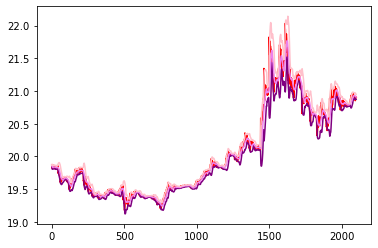

In [24]:
plt.plot(list(df_Precios['Close']), c= 'red')
plt.plot(list(df_Precios['bb_bbl']), c= 'purple')
plt.plot(list(df_Precios['bb_mavg']), c= 'violet')
plt.plot(list(df_Precios['bb_bbh']), c= 'pink')
plt.show()

In [25]:
df_Precios['Close'].iloc[-150:-1]

1949    21.06328
1950    21.06960
1951    21.07048
1952    21.03589
1953    21.05651
          ...   
2093    20.90004
2094    20.89694
2095    20.91318
2096    20.89653
2097    20.89570
Name: Close, Length: 149, dtype: float64

### Gráfica de los últimos 150 valores

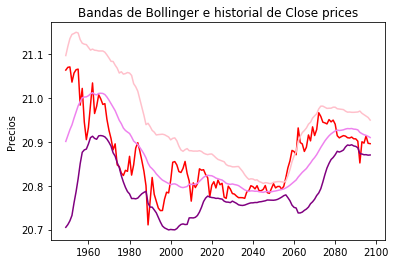

In [26]:
plt.plot(df_Precios['Close'].iloc[-150:-1], color = 'red')
plt.plot(df_Precios['bb_bbl'].iloc[-150:-1], color = 'purple')
plt.plot(df_Precios['bb_mavg'].iloc[-150:-1], color = 'violet')
plt.plot(df_Precios['bb_bbh'].iloc[-150:-1], color = 'pink')
plt.title('Bandas de Bollinger e historial de Close prices')
plt.xlabel('')
plt.ylabel('Precios')
plt.show()

## Oscilador Estocástico

El indicador estocástico es un indicador momentum, puede ser usado para saber cuando la tendencia podría acabar.
Este indicador ayuda a escoger en qué punto entrar y ya sea comprar, o vender. En este caso los parámetros son otros, cuando el indicador se encuentra usualmente arriba de 80 indica que el mercado tiene sobrecompra, lo que sugiere que los precios bajarán o tendrán una tendencia bajista, por el contrio, cuando las líneas del indicador son menores a 20 indican que el mercado está sobrevendido, lo que sugeriría que los precios subirían o que habría una tendencia alcista.

In [27]:
# Variable del indicador 
indicator_stoch = ta.momentum.StochasticOscillator(df_Precios['High'], df_Precios['Low'], df_Precios['Close'], 14, 3, False)

df_Precios['stoch_close'] = indicator_stoch.stoch()
df_Precios['stoch_signal'] = indicator_stoch.stoch_signal()

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [28]:
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl,stoch_close,stoch_signal
2094,2020-03-11 03:30:00+00:00,20.90006,20.90490,20.89106,20.89694,20.916116,20.961780,20.870452,55.524186,39.769051
2095,2020-03-11 03:35:00+00:00,20.89694,20.91318,20.89692,20.91318,20.914624,20.958593,20.870655,94.677237,67.453333
2096,2020-03-11 03:40:00+00:00,20.91319,20.91446,20.89646,20.89653,20.912418,20.955356,20.869479,73.725934,74.642452
2097,2020-03-11 03:45:00+00:00,20.89652,20.90328,20.89409,20.89570,20.909676,20.949410,20.869941,72.681515,80.361562
2098,2020-03-11 03:50:00+00:00,20.89568,20.90142,20.89562,20.89791,20.907306,20.943779,20.870833,75.614677,74.007375


In [29]:
# Parámetros

stoch_up = 80
stoch_down = 20

stoch_level = df_Precios['stoch_close'][len(df_Precios) -1]

In [30]:
stoch_level

75.61467658555063

In [31]:
# Toma de decisiones

if stoch_level > stoch_up:
    print('sell')
elif stoch_level == stoch_up:
    print('sell')
elif stoch_level < stoch_down:
    print('buy')
elif stoch_level == stoch_down:
    print('buy')
else:
    print('sin movimientos')

sin movimientos


### Gráfica de todo el historial de valores

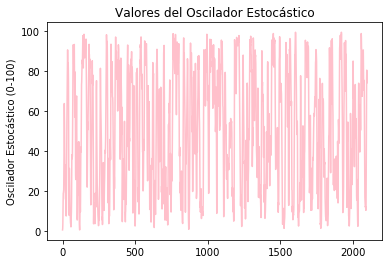

In [32]:
plt.plot(list(df_Precios['stoch_signal']), c= 'pink')
plt.title('Valores del Oscilador Estocástico')
plt.xlabel('')
plt.ylabel('Oscilador Estocástico (0-100)')
plt.show()

In [33]:
df_Precios['stoch_signal'].iloc[-150:-1]

1949    85.931833
1950    93.304844
1951    95.176955
1952    89.178534
1953    85.509498
          ...    
2093    25.770191
2094    39.769051
2095    67.453333
2096    74.642452
2097    80.361562
Name: stoch_signal, Length: 149, dtype: float64

### Gráfica de los últimos 150 valores

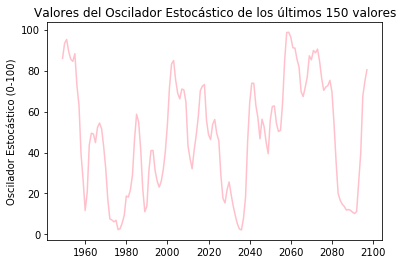

In [34]:
plt.plot(df_Precios['stoch_signal'].iloc[-150:-1], c= 'pink')
plt.title('Valores del Oscilador Estocástico de los últimos 150 valores')
plt.xlabel('')
plt.ylabel('Oscilador Estocástico (0-100)')
plt.show()

## Índice de Fuerza Relativa (RSI)

El indicador de índice de Fuerza Relativa, RSI por sus siglas en inglés (Relative Strength Index) es un indicador momentum. 
El cual indica en un rango del 0 al 100 si, en este caso la divisa esta sobrevendida o sobrecomprada. 
Usualmente cuando el valor de este índice sobrepasa los 70 indica un mercado de sobrecompra, lo que se interpretaría diciendo que es probable que en un período relativamente corto, los precios de la divisa bajarán. 
Sucede lo contrario cuando el indicador está por debajo de 30, lo que indica que existe un mercado de sobreventa, por lo que es conveniente comprar ya que se espera que suban los precios.

In [35]:
# Variable del indicador 
indicator_rsi= ta.momentum.rsi(df_Precios['Close'], 51)
df_Precios['rsi_close'] = ta.momentum.rsi(df_Precios['Close'],51)

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [36]:
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl,stoch_close,stoch_signal,rsi_close
2094,2020-03-11 03:30:00+00:00,20.90006,20.90490,20.89106,20.89694,20.916116,20.961780,20.870452,55.524186,39.769051,52.223543
2095,2020-03-11 03:35:00+00:00,20.89694,20.91318,20.89692,20.91318,20.914624,20.958593,20.870655,94.677237,67.453333,53.223500
2096,2020-03-11 03:40:00+00:00,20.91319,20.91446,20.89646,20.89653,20.912418,20.955356,20.869479,73.725934,74.642452,52.083523
2097,2020-03-11 03:45:00+00:00,20.89652,20.90328,20.89409,20.89570,20.909676,20.949410,20.869941,72.681515,80.361562,52.026862
2098,2020-03-11 03:50:00+00:00,20.89568,20.90142,20.89562,20.89791,20.907306,20.943779,20.870833,75.614677,74.007375,52.168185


In [37]:
# Parámetros

rsi_up = 70
rsi_down = 30

rsi_level = df_Precios['rsi_close'][len(df_Precios) - 1]

In [38]:
if rsi_level > rsi_up: 
    print('sell')
elif rsi_level == rsi_up:
    print('sell')
elif rsi_level < rsi_down: 
    print('buy')
elif rsi_level == rsi_down:
    print('buy')
else:
    print('sin movimientos')

sin movimientos


### Gráfica de todo el historial de valores

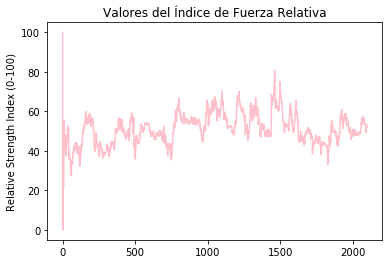

In [39]:
plt.plot(list(df_Precios['rsi_close']), c= 'pink')
plt.title('Valores del Índice de Fuerza Relativa')
plt.xlabel('')
plt.ylabel('Relative Strength Index (0-100)')
plt.show()

In [40]:
df_Precios['rsi_close'].iloc[-150:-1]

1949    58.584922
1950    58.734357
1951    58.755493
1952    57.573200
1953    58.086030
          ...    
2093    52.433309
2094    52.223543
2095    53.223500
2096    52.083523
2097    52.026862
Name: rsi_close, Length: 149, dtype: float64

### Gráfica de los últimos 150 valores

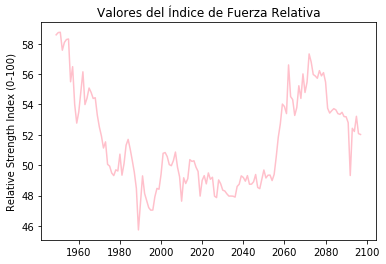

In [41]:
plt.plot(df_Precios['rsi_close'].iloc[-150:-1], c= 'pink')
plt.title('Valores del Índice de Fuerza Relativa')
plt.xlabel('')
plt.ylabel('Relative Strength Index (0-100)')
plt.show()